In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec


In [46]:
data=pd.read_csv('/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [45]:
x=data.drop('Class',axis=1)
y=data['Class']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [44]:
print(data.shape)
print(data.describe())

(41683, 31)
               Time            V1            V2            V3            V4  \
count  41683.000000  41683.000000  41683.000000  41682.000000  41682.000000   
mean   26208.345609     -0.222499      0.035454      0.711902      0.186781   
std    12721.514541      1.855101      1.599923      1.490121      1.399707   
min        0.000000    -56.407510    -72.715728    -31.103685     -5.172595   
25%    16853.000000     -0.974000     -0.533197      0.229759     -0.719018   
50%    31305.000000     -0.240189      0.093834      0.811276      0.185168   
75%    36289.000000      1.159396      0.740067      1.443056      1.069459   
max    40784.000000      1.960497     16.713389      4.101716     16.491217   

                 V5            V6            V7            V8            V9  \
count  41682.000000  41682.000000  41682.000000  41682.000000  41682.000000   
mean      -0.234719      0.099510     -0.112246      0.044579      0.193708   
std        1.387375      1.309662      

In [43]:
# Determine number of fraud cases in dataset
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.0025977774570645116
Fraud Cases: 108
Valid Transactions: 41574


In [42]:
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()

Amount details of the fraudulent transaction


count     108.000000
mean       93.512593
std       250.863273
min         0.000000
25%         1.000000
50%         2.320000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

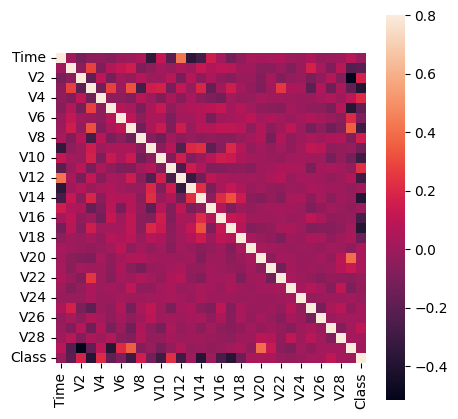

In [41]:
corrmat = data.corr()
fig = plt.figure(figsize = (5, 5))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [40]:
X = data.drop(['Class'], axis = 1)
Y = data["Class"]
print(X.shape)
print(Y.shape)
# getting just the values for the sake of processing
# (its a numpy array with no columns)
xData = X.values
yData = Y.values

(41683, 30)
(41683,)


In [38]:
# Using Scikit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(
        xData, yData, test_size = 0.2, random_state = 42)